In [1]:
import numpy as np
import pandas as pd
import datetime
import sklearn as sk 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier


plt.rcParams["figure.figsize"] = (20,10)

# Importing Data and Creating Test/Train Split

In [2]:
df = pd.read_csv(r"/home/kdudesmith/Dropbox/College/Jackman_Research/data_prep/discontinusous_tansitionless_class_balanced_random_sample.csv")
#df = pd.read_csv(r"C:\Users\kdude\Dropbox\College\Jackman_Research\data_prep\discontinusous_tansitionless_class_balanced_random_sample.csv")
#df = pd.read_csv(r"/home/kdudesmith/Dropbox/College/Jackman_Research/data_prep/xaa")


In [3]:
X_train, X_test, y_train, y_test = train_test_split( 
    df.drop(["Location", "OrbitNo", "Date", "X_MSO", "Y_MSO", "Z_MSO"], axis = 1), 
    df["Location"], 
    test_size=0.33, random_state=42)
del df

In [4]:
X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')

# Creating and Training Random Forest Classifer Model 
TODO: Implement a for loop to test different hyperparameters for the RFC

In [5]:
clf = RandomForestClassifier(max_depth=7, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, random_state=42)

# Model Evaluation 
The performance of the classifier is assesed _via_ accuracy and a confusion matrix

In [6]:
clf.score(X_test, y_test)

0.7256000564574517

In [7]:
y_test_pred = clf.predict(X_test)

confusion_matrix(y_test, y_test_pred)

array([[541710,  25694,  70454],
       [ 46143, 377229, 213892],
       [ 57760, 110969, 469094]])

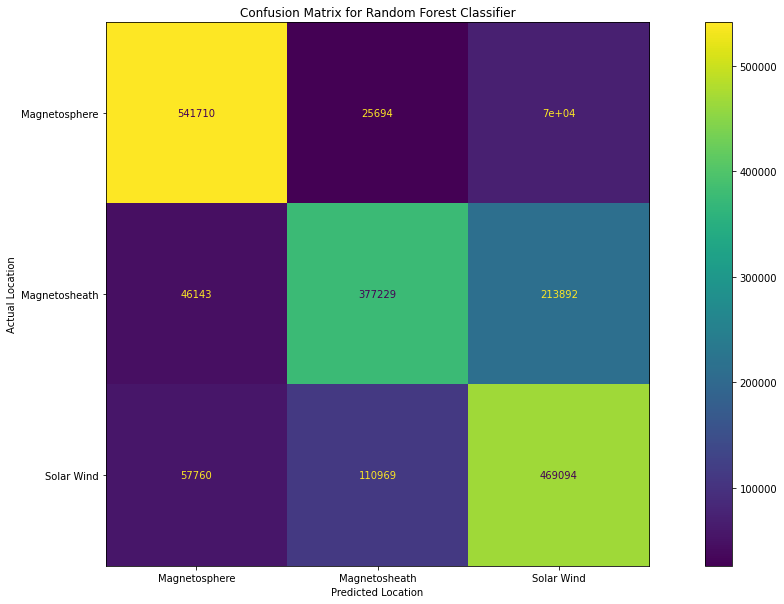

In [8]:
cm = confusion_matrix(y_test, y_test_pred)

cmd_obj = ConfusionMatrixDisplay(cm, display_labels=["Magnetosphere", "Magnetosheath", "Solar Wind"])


cmd_obj.plot()

cmd_obj.ax_.set(
                title='Confusion Matrix for Random Forest Classifier', 
                xlabel='Predicted Location', 
                ylabel='Actual Location')


plt.show()